In [5]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [6]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [8]:
!cd yolov5 & pip install -r requirements.txt

     ---------------------------------------- 0.0/40.2 kB ? eta -:--:--
     -------------------------------------- 40.2/40.2 kB 966.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/196.4 kB ? eta -:--:--
   -------------- ------------------------- 71.7/196.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 196.4/196.4 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 4.4 MB/s eta 0:00:09
   ---------------------------------------- 0.3/38.6 MB 5.4 MB/s eta 0:00:08
   ---------------------------------------- 0.5/38.6 MB 3.6 MB/s eta 0:00:11
   ---------------------------------------- 0.5/38.6 MB 3.6 MB/s eta 0:00:11
   ---------------------------------------- 0.5/38.6 MB 2.5 MB/s eta 0:00:16
    --------------------------------------- 0.7/38.6 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.8/38.6 MB 2.3 MB/s eta 0:00:17
    -----

In [28]:
import torch # used to load models and make predictions
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [10]:
model = torch.hub.load('ultralytics/yolov5','yolov5s') #loading the model yolov5 from the github directory ultralytics. yolo5s is the specific version of the yolov5

C:\anaconda\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kenneth/.cache\torch\hub\master.zip
YOLOv5  2024-1-18 Python-3.11.5 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

100%|██████████| 14.1M/14.1M [00:07<00:00, 1.95MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding Au

Make Detections

In [11]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [18]:
result = model(img) #passing the image to our model
result.print() #printing out our results

image 1/1: 480x640 1 awake
Speed: 8.1ms pre-process, 16.0ms inference, 81.4ms NMS per image at shape (1, 3, 480, 640)


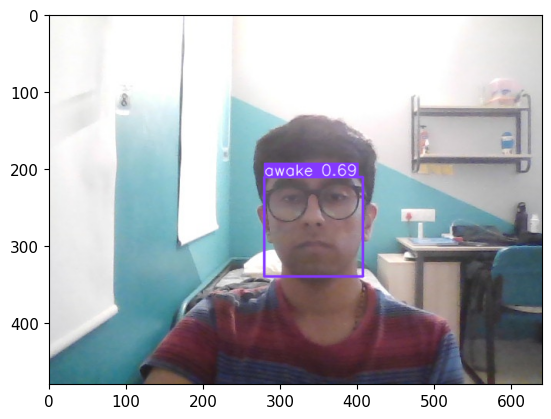

In [19]:
#rendering the image
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [17]:
img = 'https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg'

In [30]:
result1 = model(img)
result1.print()

image 1/1: 480x640 1 drowsy
Speed: 342.3ms pre-process, 7.2ms inference, 80.9ms NMS per image at shape (1, 3, 480, 640)


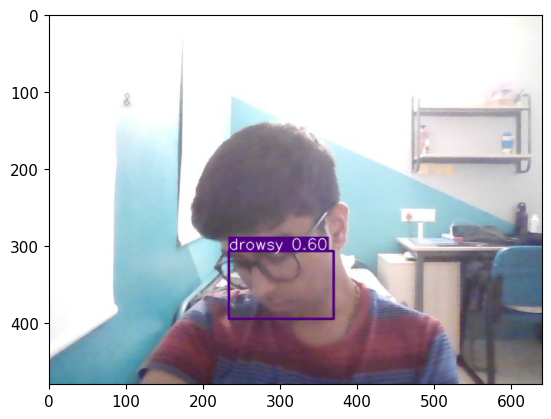

In [31]:
%matplotlib inline
plt.imshow(np.squeeze(result1.render()))
plt.show()

In [26]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() #cap.read() returns two values ret(a boolean indicating whether the frame was read successfully) and frame(the actual frame)
    
    #Make detections
    result = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(result.render())) #displays the current frame in a window named 'YOLO' and frame is the frame to be displayed
    
    if cv2.waitKey(10) & 0xFF == ord('q'): #cv2.waitKey(10) waits for the key event for 10 millisecond
        break
cap.release() #frees up the camera or video source
cv2.destroyAllWindows() #closes all OpenCV windows

Training from scratch

In [10]:
import uuid #provides functions for generating universally unique identifiers(UUIDs). UUIDs are 128 bit numbers that are typically used to uniquely identify entities or objects in a distributed system. Used to name the images
import os #provides way to interact with the operating system like opening files etc
import time #provides various time related function

In [30]:
IMAGES_PATH = os.path.join('data','images') #this is where are image data will be saved where data is the folder and images is the sub folder of the data. /data/images
labels = ['awake','drowsy'] #make two labels
number_imgs = 20 #specifying the number of images

LOAD MODEL

We will loop through our labels and collect images for awake first and then drowsy and for each one of these labels we will collect 20 images. Then we will label them using a lib or a package

In [35]:
cap = cv2.VideoCapture(0)
#loop through labels
for label in labels:
    print('Collecting images for {}'.format(label)) #format is used to replace the {} in the string with the value of the labels
    time.sleep(5) #need to wait before transitioning into each of our labels
    
    #loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label,img_num))
        
        #webcam feed
        ret, frame = cap.read()
        
        #Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') #constructs the file path for the image to be saved.
        
        #Writes out image to file
        cv2.imwrite(imgname, frame) #writes the current frame as an image to the file specified by 'imgname'
        
        #render to the screen
        cv2.imshow('Image Collection',frame) #displays the current frame in a window with the title 'Image Collection'
        
        #2 second delay between captures
        time.sleep(2) #pauses the execution of the script for 2 seconds
        
        if cv2.waitKey(10) & 0xFF == ord('q'): #cv2.waitKey(10) waits for the key event for 10 millisecond
            break
cap.release() #frees up the camera or video source
cv2.destroyAllWindows() #closes all OpenCV windows
        
        

In [32]:

for label in labels:
    print('Collecting images for {}'.format(label)) #format is used to replace the {} in the string with the value of the labels
    
    #loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label,img_num))
        


In [36]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [1]:
!pip install pyqt5 lxml --upgrade  
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

YOLO format - The YOLO anotation format represents the following values in order: class number, x centre coordinate, y centre coordinate, width, height

In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --weights yolov5s.pt --workers 2

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5



train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  2024-1-18 Python-3.11.5 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

--img 320 is the size of the image that yolo will train on. --batch refers to the number of images that are processed together in each iteration of the training process. --data dataset.yml is the dataset that contains information about the dataset being used for training. --weights this parameter us typically used to provide the path to a pre-trained model file, which contains the learned weights from a model that was already trained on a similar or related task. yolov5s.pt is the specific file provided as the initial weights. --workers 2 a worker typically refers to an independent process or thread that performs a specific task. The term "worker" is commonly used to describe units of computation that operate concurrently to achieve parallelism, which can lead to improved performance and efficiency. here 2 refers to the number of parallel processes that will be employed for loading and preparing the training data.

under results the columns represent - 
epoch
GPU memory
Generalized IoI - Generalized IoU is a metric used to evaluate the accuracy of object detection models.
Object Loss -  It measures the error associated with predicting the presence and location of objects in an image.
Classification loss - It measures the error associated with predicting the class labels of objects in an image.
Total Loss - Total Loss is the sum of all individual loss components (Object Loss, Classification Loss, and potentially others)
Targets - Targets refer to the ground truth values or labels used during the training of a machine learning model.
Image Size
Precision
Recall - Recall is a metric that measures the ability of a model to correctly identify all relevant instances.
mAP @ .5 - the mean Average Precision calculated when IoU (Intersection over Union) is set to 0.5
mAP @.5:.95 - Similar to mAP @ .5, this metric calculates the mean Average Precision across different IoU thresholds, ranging from 0.5 to 0.95.
Validation GIoU - It assesses the accuracy of object localization on data that the model has not been directly trained on.
Validation Object Loss - Similar to Object Loss, this is the loss associated with predicting the presence and location of objects.
Validation Class Loss - this is the loss associated with predicting the class labels of objects.

LOAD CUSTOM MODEL

In [8]:
model = torch.hub.load('ultralytics/yolov5','custom',path = 'yolov5/runs/train/exp/weights/last.pt',force_reload = True) #we have used custom because a custom model ( not one of the standard varients like yolov5) is being loaded. we're using the weights from the last epoch during training

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\kenneth/.cache\torch\hub\master.zip
YOLOv5  2024-1-20 Python-3.11.5 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [23]:
img = os.path.join('data','images','drowsy.1605808c-b625-11ee-8d2e-f8b54dfb5ed6.jpg')

In [24]:
results = model(img)

In [25]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 8.2ms pre-process, 16.0ms inference, 80.2ms NMS per image at shape (1, 3, 480, 640)


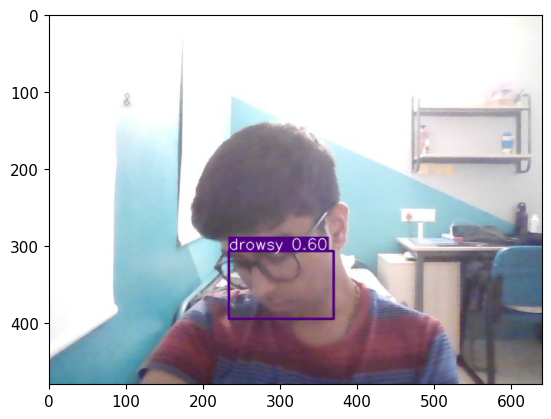

In [26]:
plt.imshow(np.squeeze(results.render()))
plt.show()

In [41]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() #cap.read() returns two values ret(a boolean indicating whether the frame was read successfully) and frame(the actual frame)
    
    #Make detections
    result = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(result.render())) #displays the current frame in a window named 'YOLO' and frame is the frame to be displayed
    
    if cv2.waitKey(10) & 0xFF == ord('q'): #cv2.waitKey(10) waits for the key event for 10 millisecond
        break
cap.release() #frees up the camera or video source
cv2.destroyAllWindows() #closes all OpenCV windows

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\anaconda\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\anaconda\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\anaconda\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\anaconda\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was f